<h2 style='color:blue' align='left'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [46]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [47]:
data_dir

'./datasets/flower_photos'

In [48]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [49]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3276552939_8c31b22d3e.jpg'),
 PosixPath('datasets/flower_photos/roses/9355706808_a9a723a8e8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12240165555_98625b1e88_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16525204061_9b47be3726_m.jpg')]

In [50]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [51]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3276552939_8c31b22d3e.jpg'),
 PosixPath('datasets/flower_photos/roses/9355706808_a9a723a8e8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12240165555_98625b1e88_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16525204061_9b47be3726_m.jpg')]

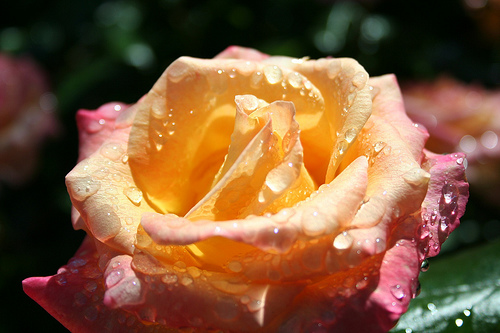

In [52]:
PIL.Image.open(str(roses[1]))

In [53]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [54]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [55]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [56]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3276552939_8c31b22d3e.jpg'),
 PosixPath('datasets/flower_photos/roses/9355706808_a9a723a8e8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12240165555_98625b1e88_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16525204061_9b47be3726_m.jpg')]

In [57]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'

In [58]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [60]:
img.shape

(229, 320, 3)

In [85]:
#cv2img1 = .resize(img,(180,180)).shape
img1 = cv2.resize(img,(180, 180))
print('img1,shape:', img1.shape)
# Get image height and width
img_height, img_width, img_channel = img1.shape
print("img_height:", img_height)
print("img_widtht:", img_width)

img1,shape: (180, 180, 3)
img_height: 180
img_widtht: 180


In [87]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    #print('len(images):', len(images))
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [91]:
#print('X[:1]:')
#print(X[:1])
#print('y[:1]')
#print(y[:1])
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [ ]:
# Do not have enought GPU VRAM to run
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

In [ ]:
model.evaluate(X_test_scaled,y_test)

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

In [ ]:
y_test[0]

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomContrast(0.9),    
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Original Image**

In [ ]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

In [ ]:
model.evaluate(X_test_scaled,y_test)

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**

- Colab: Complete Code for trains and test with "no-augment" model
- Note: 
- Due to tensorflow is static neural network model, we cannot change the model dyanmically.
- We seaprete our code into "no-agument" and "data augment"

In [ ]:
# I do not have enought GPU VRAM to run below code.
# Belwo code run under Colab only.
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it
print('data_dir:', data_dir)
import pathlib
data_dir = pathlib.Path(data_dir)
print('data_dir:', data_dir)

print("list(data_dir.glob('*/*.jpg'))[:5]:", list(data_dir.glob('*/*.jpg'))[:5])

image_count = len(list(data_dir.glob('*/*.jpg')))
print('image_count:', image_count)

roses = list(data_dir.glob('roses/*'))
print('roses[:5]:', roses[:5])

# Read flowers images from disk into numpy array using opencv
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

print("flowers_images_dict['roses'][:5]:", flowers_images_dict['roses'][:5])
img = cv2.imread(str(flowers_images_dict['roses'][0]))
# cv2img1 = .resize(img,(180,180)).shape
img1 = cv2.resize(img,(180, 180))
print('img1,shape:', img1.shape)
# Get image height and width
img_height, img_width, img_channel = img1.shape
print("img_height:", img_height)
print("img_widtht:", img_width)

X, y = [], []
for flower_name, images in flowers_images_dict.items():
    #print('len(images):', len(images))
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

X = np.array(X)
y = np.array(y)

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Preprocessing: scale images
# Do not have enought GPU VRAM to run
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Build convolutional neural network and train it
num_classes = 5
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Change epocxhs=30
print("**********Wihtout Data-Augment: Model fit**********")
model.fit(X_train_scaled, y_train, epochs=5)
print("**********Wihtout Data-Augment:Evaluation**********")
model.evaluate(X_test_scaled,y_test)
print("**********Wihtout Data-Augment:Prediction**********")
predictions = model.predict(X_test_scaled)
print('predictions:', predictions)
print("**********Wihtout Data-Augment: Score**********")
score = tf.nn.softmax(predictions[0])
print('np.argmax(score):', np.argmax(score))
print("**********Wihtout Data-Augment: y_test[0]**********")
print('y_test[0]:', y_test[0])

- No Data Augment Evaluation Accuracy: 62.64%

- No Data Augement: Result

1. Load and Dataset Read Dataset

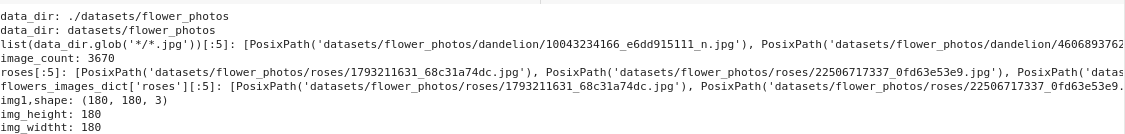

. Build Model, Evlaute, and Test Model



- Colab: Complete code for Data-agument
- Note: We cannnot run wihtout data-augment and with data-augment in the same code

In [ ]:
# Data Augment Code:
# I dont habe enought GPU VRAM to run.
# Below code run under colab only.
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

print("**********No Augmentation: Read Image File**********")
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it
print('data_dir:', data_dir)
import pathlib
data_dir = pathlib.Path(data_dir)
print('data_dir:', data_dir)

print("list(data_dir.glob('*/*.jpg'))[:5]:", list(data_dir.glob('*/*.jpg'))[:5])

print("**********No Augmentation: Image Count**********")
image_count = len(list(data_dir.glob('*/*.jpg')))
print('image_count:', image_count)

roses = list(data_dir.glob('roses/*'))
print('roses[:5]:', roses[:5])

# Read flowers images from disk into numpy array using opencv
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

print("flowers_images_dict['roses'][:5]:", flowers_images_dict['roses'][:5])
img = cv2.imread(str(flowers_images_dict['roses'][0]))
# cv2img1 = .resize(img,(180,180)).shape
img1 = cv2.resize(img,(180, 180))
print('img1,shape:', img1.shape)
# Get image height and width
print("**********No Augmentation: Image height/width**********")
img_height, img_width, img_channel = img1.shape
print("img_height:", img_height)
print("img_widtht:", img_width)

X, y = [], []
for flower_name, images in flowers_images_dict.items():
    #print('len(images):', len(images))
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

X = np.array(X)
y = np.array(y)

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Preprocessing: scale images
# Do not have enought GPU VRAM to run
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Build convolutional neural network and train it
print("**********Data Augmentation**********")
# Improve Test Accuracy Using Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomContrast(0.9),    
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

plt.axis('off')
plt.imshow(X[0])
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer
print("**********Data Augmentation: Setup Model**********")
num_classes = 5
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Change epocxhs=30
print("**********Data Augmentation: Model fit**********")
model.fit(X_train_scaled, y_train, epochs=30)            
print("**********Data Augmentation: Evaluation**********")
model.evaluate(X_test_scaled,y_test)
print("**********Data Augmentation: Prediction**********")
predictions = model.predict(X_test_scaled)
print('predictions:', predictions)
print("**********Data Augmentation: Score**********")
score = tf.nn.softmax(predictions[0])
print('np.argmax(score):', np.argmax(score))
print("**********Data Augmentation: y_test[0]**********")
print('y_test[0]:', y_test[0])

- Data Augment Evaluation Accuracy: 66.49%
- Improve from 62.64% to 66.49%

- Data Augement: Result

- Load and Dataset Read Dataset
- Data Augment: Flip, Contrast, Rotation: Zoom



- Build Model, Evlaute, and Test Model

